In [1]:
import pandas as pd
import numpy as np
from algo import numf
from matplotlib import pyplot as plt
from scipy.signal import find_peaks
from peaks import get_neighbors
from utils import initialize_matrices

np.random.seed(42)

In [2]:
# Run EDA notebook first

df = pd.read_csv('data/canada_regional_14d_avg.csv', index_col=0)
df

,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Northwest Territories,Nova Scotia,Nunavut,Ontario,Prince Edward Island,Quebec,Saskatchewan,Yukon,total
2020-01-22,0.000000,0.142857,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.428571,0.0,0.000000,0.0,0.000000,0.571429
2020-01-23,0.000000,0.071429,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.428571,0.0,0.000000,0.0,0.000000,0.500000
2020-01-24,0.000000,0.071429,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.428571,0.0,0.000000,0.0,0.000000,0.500000
2020-01-25,0.000000,0.071429,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.428571,0.0,0.000000,0.0,0.000000,0.500000
2020-01-26,0.000000,0.071429,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.428571,0.0,0.000000,0.0,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-03,109.428571,145.142857,64.000000,125.000000,41.928571,0.0,229.357143,0.0,1777.357143,45.5,923.285714,0.0,2.642857,3463.642857
2022-10-04,109.428571,145.142857,64.000000,125.000000,41.928571,0.0,229.357143,0.0,1777.357143,45.5,956.571429,0.0,2.214286,3496.500000
2022-10-05,109.428571,145.142857,64.000000,125.000000,41.928571,0.0,229.357143,0.0,1812.285714,91.0,958.714286,0.0,2.214286,3579.071429
2022-10-06,0.000000,145.142857,64.000000,164.857143,53.571429,0.0,298.142857,0.0,1812.285714,91.0,928.857143,0.0,2.785714,3560.642857


<AxesSubplot:>

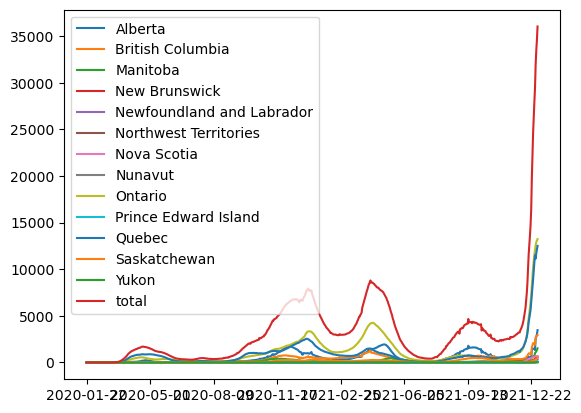

In [3]:
# limiting to 1 January 2022 (close when they stopped testing, source: https://www.npr.org/2022/01/09/1071706554/canadas-covid-testing-crisis)
df = df.loc[: '2022-01-01', :]
df.plot()

## Splitting dataset

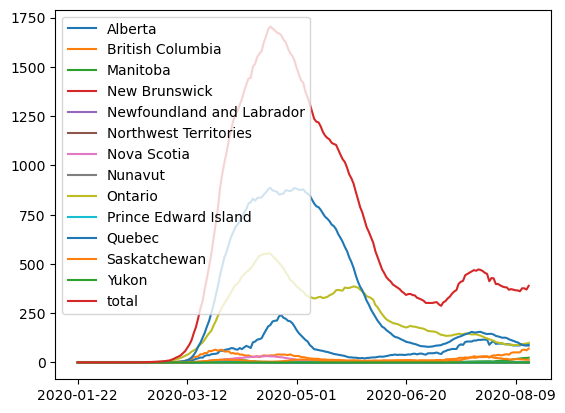

In [4]:
# first split
df.loc[: '2020-08-15', :].plot()
df.loc[: '2020-08-15', :].to_csv('data/canada_regional_14d_avg_split1.csv')

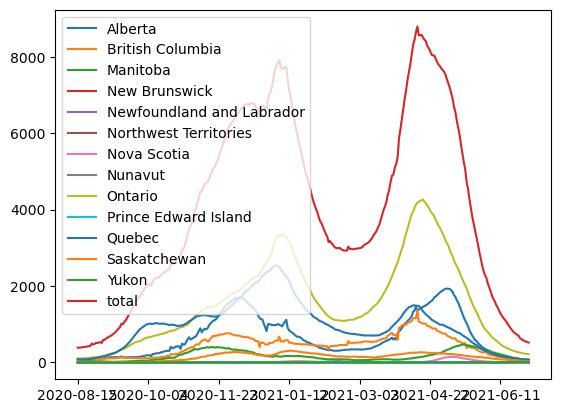

In [5]:
# second split
df.loc['2020-08-15': '2021-07-01', :].plot()
df.loc['2020-08-15': '2021-07-01', :].to_csv('data/canada_regional_14d_avg_split2.csv')

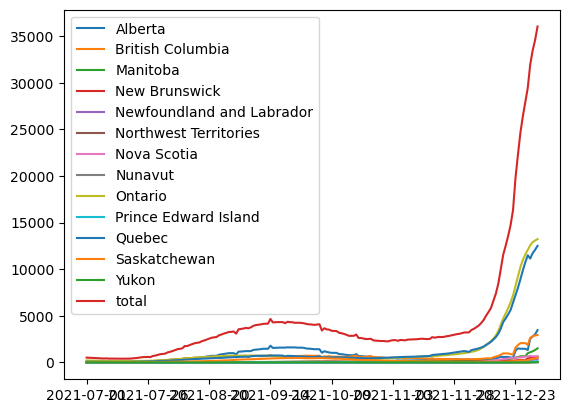

In [6]:
# third split
df.loc['2021-07-01':, :].plot()
df.loc['2021-07-01':, :].to_csv('data/canada_regional_14d_avg_split3.csv')

## Running NuMF on split datasets

In [7]:
iters = 200

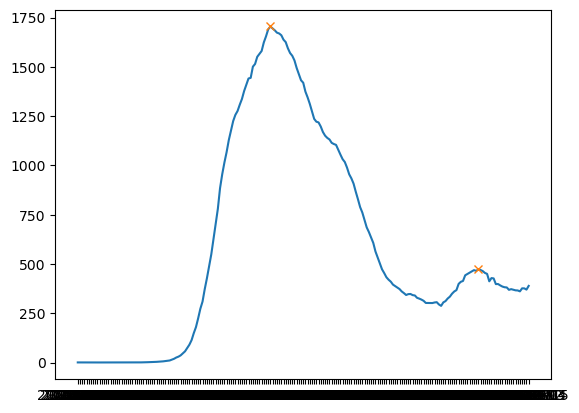

In [8]:
df1 = pd.read_csv('data/canada_regional_14d_avg_split1.csv', index_col=0)

# finding peaks
peaks, _ = find_peaks(x=df1['total'], prominence=1, width=6)
plt.plot(df1.index, df1['total'])
plt.plot(df1.index[peaks], df1.loc[df1.index[peaks], ['total']], 'x')

In [9]:
M1 = df1['total'].to_numpy().reshape(-1, 1)
m, n = M1.shape

# note: rank based on number of peaks, rank = 2
pvals1 = get_neighbors(peaks, m, nrad=3)    # array of points close to peak locations

0.6457360591263771
W and H matrices saved in saved_output/14day/split1_it200_no_reg.npz in 5 iterations.
0.5753289770867019
W and H matrices saved in saved_output/14day/split1_it200_no_reg.npz in 10 iterations.
0.5247683535753753
W and H matrices saved in saved_output/14day/split1_it200_no_reg.npz in 15 iterations.
0.48653913250628195
W and H matrices saved in saved_output/14day/split1_it200_no_reg.npz in 20 iterations.
0.4548590812915034
W and H matrices saved in saved_output/14day/split1_it200_no_reg.npz in 25 iterations.
0.4266068811213249
W and H matrices saved in saved_output/14day/split1_it200_no_reg.npz in 30 iterations.
0.4015592561851835
W and H matrices saved in saved_output/14day/split1_it200_no_reg.npz in 35 iterations.
0.3791902536454041
W and H matrices saved in saved_output/14day/split1_it200_no_reg.npz in 40 iterations.
0.3594060134244592
W and H matrices saved in saved_output/14day/split1_it200_no_reg.npz in 45 iterations.
0.3402424366470894
W and H matrices saved in s

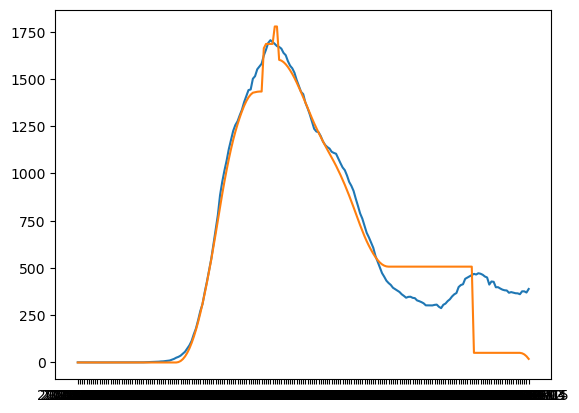

In [10]:
# No regularization
W1, H1 = initialize_matrices(m, n, r=2)
W1, H1, pouts1 = numf(M1, W1, H1, pvals=pvals1, iters=iters, save_file=f'saved_output/14day/split1_it{iters}_no_reg.npz')
plt.plot(df1.index, M1)
plt.plot(df1.index, W1 @ H1)

0.5698830726601342
W and H matrices saved in saved_output/14day/split1_it200_reg.npz in 5 iterations.
0.5075004428070985
W and H matrices saved in saved_output/14day/split1_it200_reg.npz in 10 iterations.
0.4662176480764576
W and H matrices saved in saved_output/14day/split1_it200_reg.npz in 15 iterations.
0.438662413521286
W and H matrices saved in saved_output/14day/split1_it200_reg.npz in 20 iterations.
0.41788643172116746
W and H matrices saved in saved_output/14day/split1_it200_reg.npz in 25 iterations.
0.3999287562060182
W and H matrices saved in saved_output/14day/split1_it200_reg.npz in 30 iterations.
0.3836508724884534
W and H matrices saved in saved_output/14day/split1_it200_reg.npz in 35 iterations.
0.36864823058284923
W and H matrices saved in saved_output/14day/split1_it200_reg.npz in 40 iterations.
0.3547597605669949
W and H matrices saved in saved_output/14day/split1_it200_reg.npz in 45 iterations.
0.34188141181939063
W and H matrices saved in saved_output/14day/split1_i

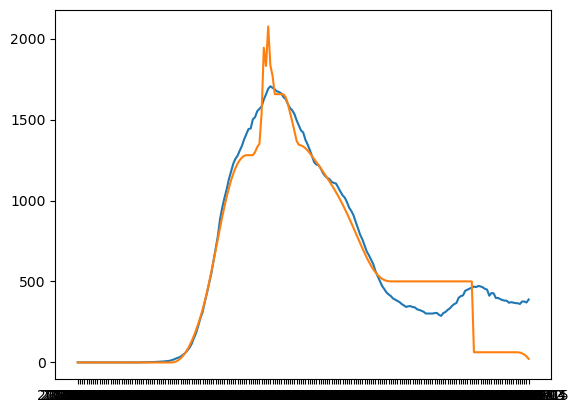

In [11]:
# With regularization (l2=0.2)
W1reg, H1reg = initialize_matrices(m, n, r=2)
W1reg, H1reg, pouts1_reg = numf(M1, W1reg, H1reg, pvals=pvals1, l2=0.2, iters=iters, save_file=f'saved_output/14day/split1_it{iters}_reg.npz')
plt.plot(df1.index, M1)
plt.plot(df1.index, W1reg @ H1reg)

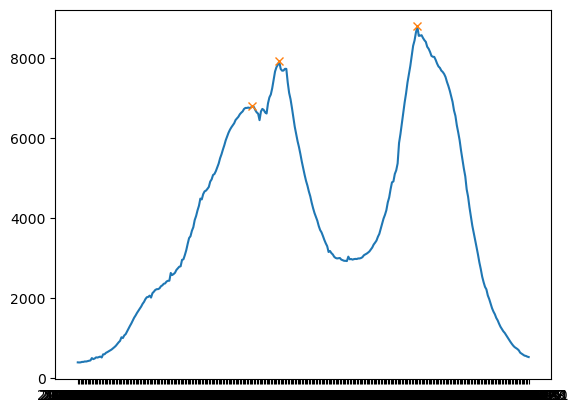

In [12]:
df2 = pd.read_csv('data/canada_regional_14d_avg_split2.csv', index_col=0)

# finding peaks
peaks, _ = find_peaks(x=df2['total'], prominence=1, width=6)
plt.plot(df2.index, df2['total'])
plt.plot(df2.index[peaks], df2.loc[df2.index[peaks], ['total']], 'x')

In [13]:
M2 = df2['total'].to_numpy().reshape(-1, 1)
m, n = M2.shape

# rank = 3
pvals2 = get_neighbors(peaks, m, nrad=3)

0.5390054395156757
W and H matrices saved in saved_output/14day/split2_it200_no_reg.npz in 5 iterations.
0.36249024397096136
W and H matrices saved in saved_output/14day/split2_it200_no_reg.npz in 10 iterations.
0.3021150729653913
W and H matrices saved in saved_output/14day/split2_it200_no_reg.npz in 15 iterations.
0.27772421479656567
W and H matrices saved in saved_output/14day/split2_it200_no_reg.npz in 20 iterations.
0.2651315890334665
W and H matrices saved in saved_output/14day/split2_it200_no_reg.npz in 25 iterations.
0.25374744789030385
W and H matrices saved in saved_output/14day/split2_it200_no_reg.npz in 30 iterations.
0.24343434718020818
W and H matrices saved in saved_output/14day/split2_it200_no_reg.npz in 35 iterations.
0.2341082986739763
W and H matrices saved in saved_output/14day/split2_it200_no_reg.npz in 40 iterations.
0.2256822076829969
W and H matrices saved in saved_output/14day/split2_it200_no_reg.npz in 45 iterations.
0.2180567195384204
W and H matrices saved i

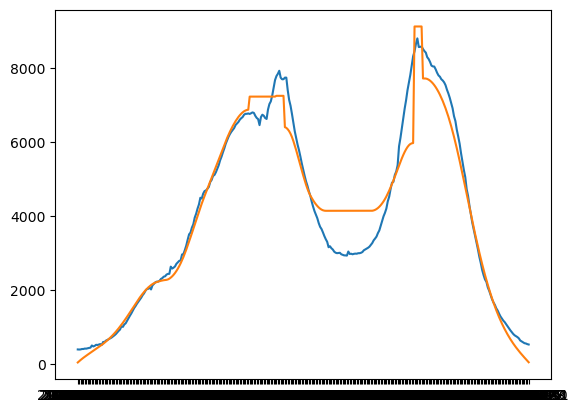

In [14]:
W2, H2 = initialize_matrices(m, n, r=3)
W2, H2, pout2 = numf(M2, W2, H2, pvals=pvals2, iters=iters, save_file=f'saved_output/14day/split2_it{iters}_no_reg.npz')
plt.plot(df2.index, M2)
plt.plot(df2.index, W2 @ H2)

0.6918439913540833
W and H matrices saved in saved_output/14day/split2_it200_reg.npz in 5 iterations.
0.6808953867438863
W and H matrices saved in saved_output/14day/split2_it200_reg.npz in 10 iterations.
0.6708347493066511
W and H matrices saved in saved_output/14day/split2_it200_reg.npz in 15 iterations.
0.661520350901025
W and H matrices saved in saved_output/14day/split2_it200_reg.npz in 20 iterations.
0.6529272504304828
W and H matrices saved in saved_output/14day/split2_it200_reg.npz in 25 iterations.
0.6450355215116782
W and H matrices saved in saved_output/14day/split2_it200_reg.npz in 30 iterations.
0.6378193008048847
W and H matrices saved in saved_output/14day/split2_it200_reg.npz in 35 iterations.
0.6312429113365663
W and H matrices saved in saved_output/14day/split2_it200_reg.npz in 40 iterations.
0.6252663544116224
W and H matrices saved in saved_output/14day/split2_it200_reg.npz in 45 iterations.
0.6198755584566676
W and H matrices saved in saved_output/14day/split2_it20

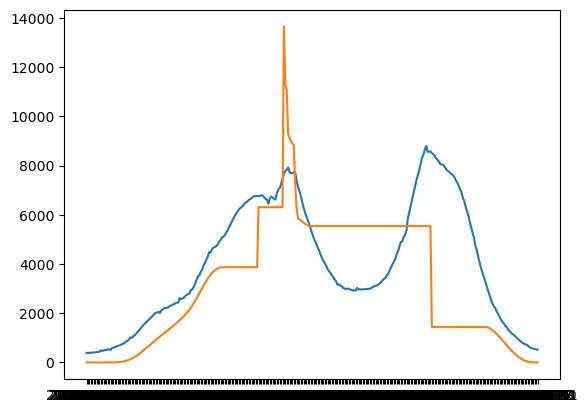

In [15]:
# With regularization (l2=0.2)
W2reg, H2reg = initialize_matrices(m, n, r=2)
W2reg, H2reg, pouts2_reg = numf(M2, W2reg, H2reg, pvals=pvals2, l2=0.2, iters=iters, save_file=f'saved_output/14day/split2_it{iters}_reg.npz')
plt.plot(df2.index, M2)
plt.plot(df2.index, W2reg @ H2reg)

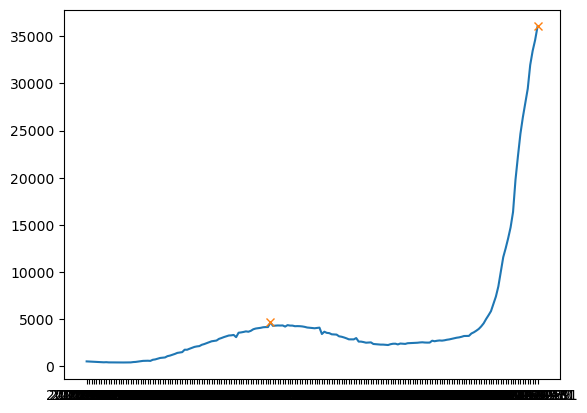

In [16]:
df3 = pd.read_csv('data/canada_regional_14d_avg_split3.csv', index_col=0)

# finding peaks
peaks, _ = find_peaks(x=df3['total'], prominence=1, width=6)
peaks = np.append(peaks, [df3.shape[0] - 1])    # adds last index to peak locations
plt.plot(df3.index, df3['total'])
plt.plot(df3.index[peaks], df3.loc[df3.index[peaks], ['total']], 'x')

In [17]:
M3 = df3['total'].to_numpy().reshape(-1, 1)
m, n = M3.shape

# rank = 2
pvals3 = get_neighbors(peaks, m, nrad=3)

0.42381440485360533
W and H matrices saved in saved_output/14day/split3_it200_no_reg.npz in 5 iterations.
0.40869179237640596
W and H matrices saved in saved_output/14day/split3_it200_no_reg.npz in 10 iterations.
0.39761907148789455
W and H matrices saved in saved_output/14day/split3_it200_no_reg.npz in 15 iterations.
0.38886855919312924
W and H matrices saved in saved_output/14day/split3_it200_no_reg.npz in 20 iterations.
0.3820453315809639
W and H matrices saved in saved_output/14day/split3_it200_no_reg.npz in 25 iterations.
0.3759112555674854
W and H matrices saved in saved_output/14day/split3_it200_no_reg.npz in 30 iterations.
0.370310706622273
W and H matrices saved in saved_output/14day/split3_it200_no_reg.npz in 35 iterations.
0.3651499640119832
W and H matrices saved in saved_output/14day/split3_it200_no_reg.npz in 40 iterations.
0.36037942547745727
W and H matrices saved in saved_output/14day/split3_it200_no_reg.npz in 45 iterations.
0.35595664395573445
W and H matrices saved 

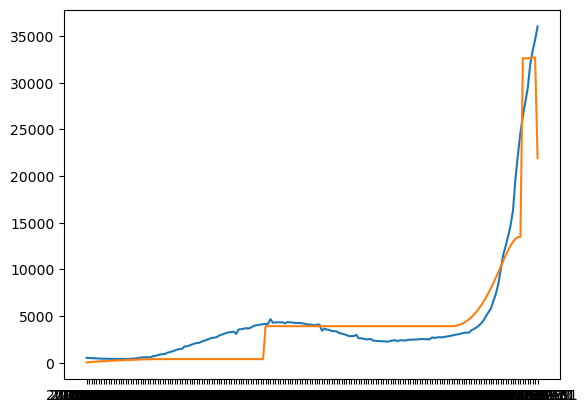

In [18]:
W3, H3 = initialize_matrices(m, n, r=2)
W3, H3, pout3 = numf(M3, W3, H3, pvals=pvals3, iters=iters, save_file=f'saved_output/14day/split3_it{iters}_no_reg.npz')
plt.plot(df3.index, M3)
plt.plot(df3.index, W3 @ H3)

0.7609813950342594
W and H matrices saved in saved_output/14day/split3_it200_reg.npz in 5 iterations.
0.6939397228864321
W and H matrices saved in saved_output/14day/split3_it200_reg.npz in 10 iterations.
0.661387359089765
W and H matrices saved in saved_output/14day/split3_it200_reg.npz in 15 iterations.
0.6239309906160666
W and H matrices saved in saved_output/14day/split3_it200_reg.npz in 20 iterations.
0.6061260325206965
W and H matrices saved in saved_output/14day/split3_it200_reg.npz in 25 iterations.
0.5915835481476235
W and H matrices saved in saved_output/14day/split3_it200_reg.npz in 30 iterations.
0.5735176822999348
W and H matrices saved in saved_output/14day/split3_it200_reg.npz in 35 iterations.
0.5640472346390281
W and H matrices saved in saved_output/14day/split3_it200_reg.npz in 40 iterations.
0.5553920485586246
W and H matrices saved in saved_output/14day/split3_it200_reg.npz in 45 iterations.
0.5473527765992907
W and H matrices saved in saved_output/14day/split3_it20

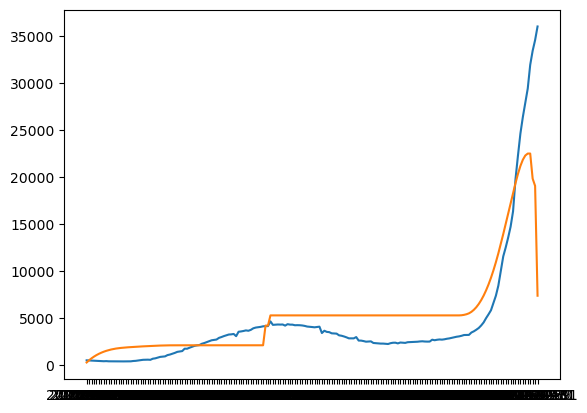

In [19]:
# With regularization (l2=0.2)
W3reg, H3reg = initialize_matrices(m, n, r=2)
W3reg, H3reg, pouts3_reg = numf(M3, W3reg, H3reg, pvals=pvals3, l2=0.2, iters=iters, save_file=f'saved_output/14day/split3_it{iters}_reg.npz')
plt.plot(df3.index, M3)
plt.plot(df3.index, W3reg @ H3reg)

## On Complete Dataset

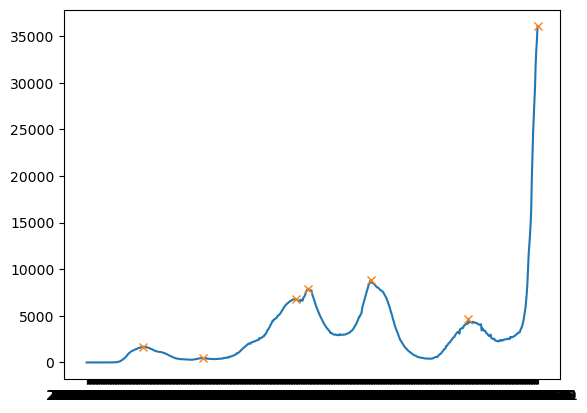

In [20]:
# finding peaks
peaks, _ = find_peaks(x=df['total'], prominence=1, width=6)
peaks = np.append(peaks, [df.shape[0] - 1])    # adds last index to peak locations
plt.plot(df.index, df['total'])
plt.plot(df.index[peaks], df.loc[df.index[peaks], ['total']], 'x')

In [21]:
M_comp = df['total'].to_numpy().reshape(-1, 1)
m, n = M_comp.shape

# rank = 8
pvals_comp = get_neighbors(peaks, m, nrad=3)

0.45508618923686966
W and H matrices saved in saved_output/14day/comp_it200_no_reg.npz in 5 iterations.
0.2322058739723379
W and H matrices saved in saved_output/14day/comp_it200_no_reg.npz in 10 iterations.
0.21489985610188536
W and H matrices saved in saved_output/14day/comp_it200_no_reg.npz in 15 iterations.
0.2071214647462906
W and H matrices saved in saved_output/14day/comp_it200_no_reg.npz in 20 iterations.
0.2014658617014082
W and H matrices saved in saved_output/14day/comp_it200_no_reg.npz in 25 iterations.
0.19680724144959577
W and H matrices saved in saved_output/14day/comp_it200_no_reg.npz in 30 iterations.
0.1926841292439978
W and H matrices saved in saved_output/14day/comp_it200_no_reg.npz in 35 iterations.
0.18894158144880693
W and H matrices saved in saved_output/14day/comp_it200_no_reg.npz in 40 iterations.
0.1855100941971933
W and H matrices saved in saved_output/14day/comp_it200_no_reg.npz in 45 iterations.
0.18232972321315877
W and H matrices saved in saved_output/14

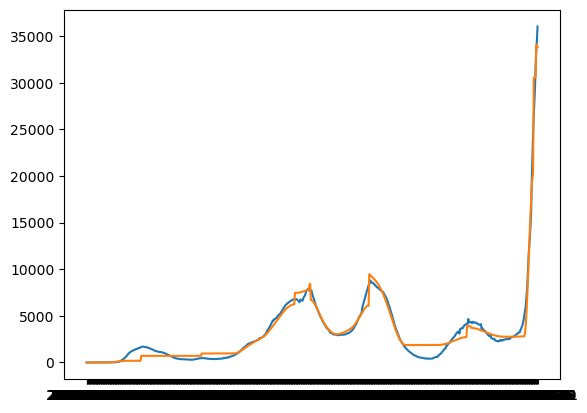

In [22]:
W_comp, H_comp = initialize_matrices(m, n, r=8)
W_comp, H_comp, pout_comp = numf(M_comp, W_comp, H_comp, pvals=pvals_comp, iters=iters, save_file=f'saved_output/14day/comp_it{iters}_no_reg.npz')
plt.plot(df.index, M_comp)
plt.plot(df.index, W_comp @ H_comp)

0.681949414396522
W and H matrices saved in saved_output/14day/comp_it200_reg.npz in 5 iterations.
0.643903664097361
W and H matrices saved in saved_output/14day/comp_it200_reg.npz in 10 iterations.
0.613661296239071
W and H matrices saved in saved_output/14day/comp_it200_reg.npz in 15 iterations.
0.5913008018528239
W and H matrices saved in saved_output/14day/comp_it200_reg.npz in 20 iterations.
0.5820803597234631
W and H matrices saved in saved_output/14day/comp_it200_reg.npz in 25 iterations.
0.5765812382026911
W and H matrices saved in saved_output/14day/comp_it200_reg.npz in 30 iterations.
0.5722131164035749
W and H matrices saved in saved_output/14day/comp_it200_reg.npz in 35 iterations.
0.5682027256155899
W and H matrices saved in saved_output/14day/comp_it200_reg.npz in 40 iterations.
0.5642542845687064
W and H matrices saved in saved_output/14day/comp_it200_reg.npz in 45 iterations.
0.560934268670564
W and H matrices saved in saved_output/14day/comp_it200_reg.npz in 50 iterati

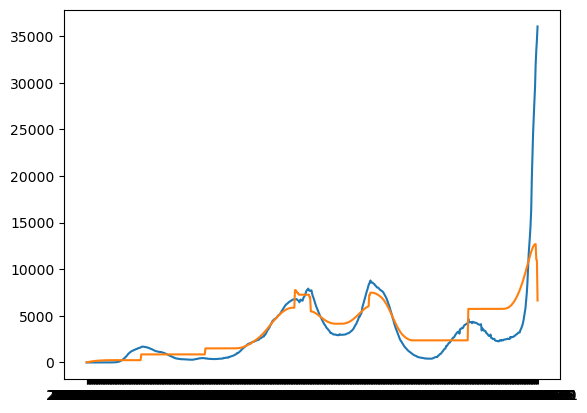

In [23]:
W_reg, H_reg = initialize_matrices(m, n, r=8)
W_reg, H_reg, pout_reg = numf(M_comp, W_reg, H_reg, pvals=pvals_comp, l2=0.2, iters=iters, save_file=f'saved_output/14day/comp_it{iters}_reg.npz')
plt.plot(df.index, M_comp)
plt.plot(df.index, W_reg @ H_reg)